### **The Sparks Foundation - Data Science and Business Analytics Internship**

Task 1: Prediction using Supervised Machine Learning


### **Step 1:**
Importing the libraries required in the notebook

In [14]:
import pandas as pd #imports pandas library
import numpy as np  #imports numpy library
import matplotlib.pyplot as plt  #imports matplotlib library
%matplotlib inline 
#plots directly below the code cell that produced it

### **Step 2:**
Importing and reading the data from .csv file

In [15]:
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")
s_data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [16]:
s_data.shape # To find the number of columns and rows 

(25, 2)

### **Step 3:**
Plotting the dataset

In this step we will plot the dataset to check whether we can observe any relation between the two variables or not

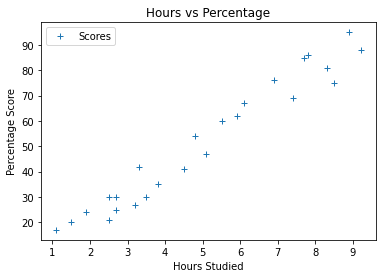

In [19]:
s_data.plot(x='Hours', y='Scores', style='+')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can observe that there is a linear relationship between "hours studied" and "percentage score". So, we can use the linear regression supervised machine model on it to predict further values.


### **Step 4:**
Preparing the data into attributes and labels

In this step we will divide the data into "attributes" (inputs) and "labels" (outputs). After that we will split the whole dataset into 2 parts - testing data and training data.

In [20]:
#using iloc function we will divide the data 

X = s_data.iloc[:, :-1].values  #all columns except last 
y = s_data.iloc[:, 1:].values #1st columns 
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]


In [21]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 
print ("X_train: ", X_train)
print ("y_train: ", y_train)
print("X_test: ", X_test)
print ("y_test: ", y_test)

X_train:  [[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
y_train:  [[35]
 [24]
 [86]
 [76]
 [17]
 [47]
 [85]
 [42]
 [81]
 [88]
 [67]
 [30]
 [25]
 [60]
 [30]
 [75]
 [21]
 [54]
 [95]
 [41]]
X_test:  [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
y_test:  [[20]
 [27]
 [69]
 [30]
 [62]]


### **Step 5:**
Training the Alogrithms

We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [22]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
print("Training complete.")
print(regressor.intercept_)

Training complete.
[2.01816004]


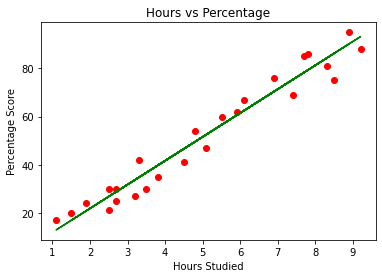

In [32]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.title("Hours vs Percentage")
plt.scatter(X, y,color="red")
plt.plot(X, line,color="green");
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

### **Step 6:**
Making Predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [33]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [34]:
# Comparing Actual vs Predicted
comp = pd.DataFrame({'Actual': [y_test], 'Predicted': [y_pred] })
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


In [35]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = ",hours)
print("Predicted Score = ",own_pred[0])

No of Hours =  9.25
Predicted Score =  [93.69173249]


### **Step 7:**
Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [36]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
